# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

file_with_path = "./NYC_Dataset2023/2023-1.parquet"
df = pd.read_parquet(file_with_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
absolute_data_file_path=os.getcwd()+ "./NYC_Dataset2023/"

# Create a list of all the twelve files to read
file_list = [i for i in os.listdir(absolute_data_file_path) if i.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(absolute_data_file_path, file_name)
        
        # Reading the current file
        monthly_file_df = pd.read_parquet(file_path)
        #Format [tpep_pickup_datetime] to appropriate datetime format
        monthly_file_df["tpep_pickup_datetime"] = pd.to_datetime(monthly_file_df["tpep_pickup_datetime"])
        monthly_file_df["tpep_dropoff_datetime"] = pd.to_datetime(monthly_file_df["tpep_dropoff_datetime"])

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        
        #adding date and hour column in monythly data
        monthly_file_df["date"] = monthly_file_df['tpep_pickup_datetime'].dt.date
        monthly_file_df["hour"] = monthly_file_df['tpep_pickup_datetime'].dt.hour
        #--sampled_data = pd.DataFrame()
        monthly_sample_data = pd.DataFrame()

        
        # Loop through dates and then loop through every hour of each date
        #find unique date
        unique_date = monthly_file_df['date'].unique()
        #print(unique_date)
        for date in unique_date:
            daily_df = monthly_file_df[monthly_file_df["date"] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df["hour"] == hour]
                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    hourly_5pcnt_df = hourly_df.sample(frac=0.05, random_state=42)
                    # add data of this hour to the dataframe
                    monthly_sample_data = pd.concat([monthly_sample_data, hourly_5pcnt_df], ignore_index=True)
        
        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier
        df =  pd.concat([df, monthly_sample_data], ignore_index=True)

        #delete dataframe which is not required
        del monthly_sample_data, monthly_file_df,daily_df,hourly_df

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_parquet('Sample_NYC_TripData2023.parquet',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet("Sample_NYC_TripData2023.parquet")

In [10]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

- `passenger_count` and `RatecodeID` nan be converted to correct datatype `int64`  

In [12]:
df['passenger_count'] = df['passenger_count'].astype('Int64')
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
print(df.index)

#Since "store_and_fwd_flag" column will not be used so the column can be dropped.
df.drop(columns=["store_and_fwd_flag"], inplace=True)
df.info()

RangeIndex(start=0, stop=1896400, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

#Data analysis for "Airport_fee" and "airport_fee"
print(df["Airport_fee"].sum())
print(df["airport_fee"].sum())
print(df["Airport_fee"].isnull().sum())
print(df["airport_fee"].isnull().sum())

#Since either "Airport_fee" is null or "airport_fee" is null so we are combining both
df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

print(df["airport_fee"].isnull().sum())
print(df["airport_fee"].sum())
print(df.info())


245530.75
16190.0
213357
1747917
0
261720.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee         

In [15]:
#drop Airport_fee column
df.drop(columns=['Airport_fee'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [16]:
# check where values of fare amount are negative
negative_fare_df = df[df['fare_amount'] < 0]
print("Total records with negative amount => ",  negative_fare_df.shape[0])
print("Pcnt of data with Negative amount => ", round(100*(negative_fare_df.shape[0]/df.shape[0]),2), "%")

Total records with negative amount =>  0
Pcnt of data with Negative amount =>  0.0 %


Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts ( value counts for "RatecodeID")
df[df.fare_amount < 0].RatecodeID.value_counts()

Series([], Name: count, dtype: Int64)

In [18]:
# Find which columns have negative values
negative_values_df = df.select_dtypes(include=['number']) < 0
negative_values_df.sum()

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     3
mta_tax                  73
tip_amount                0
tolls_amount              0
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
hour                      0
dtype: Int64

In [19]:
# fix these negative values
# Fill the missing values with absolute values
df[['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']] = df[['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']].apply(lambda x : abs(x))
negative_values_df = df.select_dtypes(include=['number']) < 0
negative_values_df.sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
hour                     0
dtype: Int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column
print(round(df.isnull().mean()*100,4))

VendorID                 0.0000
tpep_pickup_datetime     0.0000
tpep_dropoff_datetime    0.0000
passenger_count          3.4209
trip_distance            0.0000
RatecodeID               3.4209
PULocationID             0.0000
DOLocationID             0.0000
payment_type             0.0000
fare_amount              0.0000
extra                    0.0000
mta_tax                  0.0000
tip_amount               0.0000
tolls_amount             0.0000
improvement_surcharge    0.0000
total_amount             0.0000
congestion_surcharge     3.4209
airport_fee              0.0000
date                     0.0000
hour                     0.0000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
print("Number of rows with Missing values for passenger_count => ",  df[df["passenger_count"].isnull()].shape[0])
df[df["passenger_count"].isnull()]


Number of rows with Missing values for passenger_count =>  64874


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00             <NA>   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50             <NA>   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18             <NA>   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49             <NA>   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06             <NA>   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35             <NA>   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22             <NA>   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03             <NA>   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01             <NA>   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46             <NA>   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24        <NA>            66           107             0   
15               10.77        <NA>           151           106             0   
42                4.52        <NA>           114           262             0   
43                9.19        <NA>           239           256             0   
46                2.74        <NA>            90            48             0   
...                ...         ...           ...           ...           ...   
1896343           0.00        <NA>            43           229             0   
1896356           0.00        <NA>           255           209             0   
1896369           0.00        <NA>           137           249             0   
1896376           3.50        <NA>           233           144             0   
1896387           0.00        <NA>           231            90             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896343        12.55    0.0      0.5        0.00          0.00   
1896356        34.02    0.0      0.5        0.00          0.00   
1896369        21.50    0.0      0.5        0.00          0.00   
1896376        21.28    0.0      0.5        0.00          0.00   
1896387        15.68    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896343                    1.0         16.55                   NaN   
1896356                    1.0         38.02                   NaN   
1896369                    1.0         25.50                   NaN   
1896376                    1.0         25.28                   NaN   
1896387                    1.0         19.68                   NaN   

         airport_fee        date  hour  
4                0.0  2023-01-01     0  
15               0.0  2023-01-01     0  
42               0.0  2023-01-01     0  
43               0.0  2023-01-01     0  
46               0.0  2023-01-01     0  
...              ...         ...   ...  
1896343          0.0  2023-09-30    23  
1896356          0.0  2023-09-30    23  
1896369          0.0  2023-09-30    23  
1896376          0.0  2023-09-3

In [22]:
# Impute NaN values in 'passenger_count'
#Can be filled with mode values.
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])

print("Number of rows with Missing values for passenger_count => ",  df[df["passenger_count"].isnull()].shape[0])


Number of rows with Missing values for passenger_count =>  0


In [23]:
print(df["passenger_count"].value_counts())
print(df["passenger_count"].mode()[0])

#Replace 0 values with mode
df["passenger_count"] = df["passenger_count"].replace(0, df["passenger_count"].mode()[0])
print(df["passenger_count"].value_counts())

passenger_count
1    1442098
2     277298
3      69034
4      38537
0      29681
5      23871
6      15860
8         11
7          5
9          5
Name: count, dtype: Int64
1
passenger_count
1    1471779
2     277298
3      69034
4      38537
5      23871
6      15860
8         11
7          5
9          5
Name: count, dtype: Int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [24]:
# Fix missing values in 'RatecodeID'
print("Number of rows with Missing values for RatecodeID => ",  df[df["RatecodeID"].isnull()].shape[0])

#Can be filled with mode values.
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])

print("Number of rows with Missing values for RatecodeID => ",  df[df["RatecodeID"].isnull()].shape[0])

Number of rows with Missing values for RatecodeID =>  64874
Number of rows with Missing values for RatecodeID =>  0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [25]:
# handle null values in congestion_surcharge
print("Number of rows with Missing values for congestion_surcharge => ",  df[df["congestion_surcharge"].isnull()].shape[0])

#Can be filled with mode values.
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0])

print("Number of rows with Missing values for congestion_surcharge => ",  df[df["congestion_surcharge"].isnull()].shape[0])

Number of rows with Missing values for congestion_surcharge =>  64874
Number of rows with Missing values for congestion_surcharge =>  0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [26]:
# Handle any remaining missing values
print(round(df.isnull().mean()*100,4))

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
date                     0.0
hour                     0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count        1896400.0   1.896400e+06   1896400.0  1.896400e+06  1.896400e+06   
mean          1.372236   3.858293e+00    1.612981  1.652814e+02  1.640515e+02   
min                1.0   0.000000e+00         1.0  1.000000e+00  1.000000e+00   
25%                1.0   1.050000e+00         1.0  1.320000e+02  1.140000e+02   
50%                1.0   1.790000e+00         1.0  1.620000e+02  1.620000e+02   
75%                1.0   3.400000e+00         1.0  2.340000e+02  2.340000e+02   
max                9.0   1.263605e+05        99.0  2.650000e+02  2.650000e+02   
std           0.864404   1.294085e+02    7.267261  6.400038e+01  6.980207e+01   

       payment_type   fare_amount         extra       mta_tax    tip_amount  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01  3.547011e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01  1.000000e+00   
50%    1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01  2.850000e+00   
75%    1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01  4.420000e+00   
max    4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00  2.230800e+02   
std    5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02  4.054882e+00   

       tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06           1.896400e+06  1.896400e+06   
mean   5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00           0.000000e+00  0.000000e+00   
25%    0.000000e+00           1.000000e+00  1.596000e+01   
50%    0.000000e+00           1.000000e+00  2.100000e+01   
75%    0.000000e+00           1.000000e+00  3.094000e+01   
max    1.430000e+02           1.000000e+00  1.431675e+05   
std    2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge   airport_fee          hour  
count          1.896400e+06  1.896400e+06  1.896400e+06  
mean           2.314256e+00  1.380348e-01  1.426504e+01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  1.100000e+01  
50%            2.500000e+00  0.000000e+00  1.500000e+01  
75%            2.500000e+00  0.000000e+00  1.900000e+01  
max            2.500000e+00  1.750000e+00  2.300000e+01  
std            6.556359e-01  4.575819e-01  5.807381e+00

- Represent above the data distribution for each column using boxplots to understand possible outlier.

In [28]:
print("Number of numerical columns are : " , len(df.select_dtypes(include=['number']).columns))
print(df.select_dtypes(include=['number']).columns)

Number of numerical columns are :  17
Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'hour'],
      dtype='object')


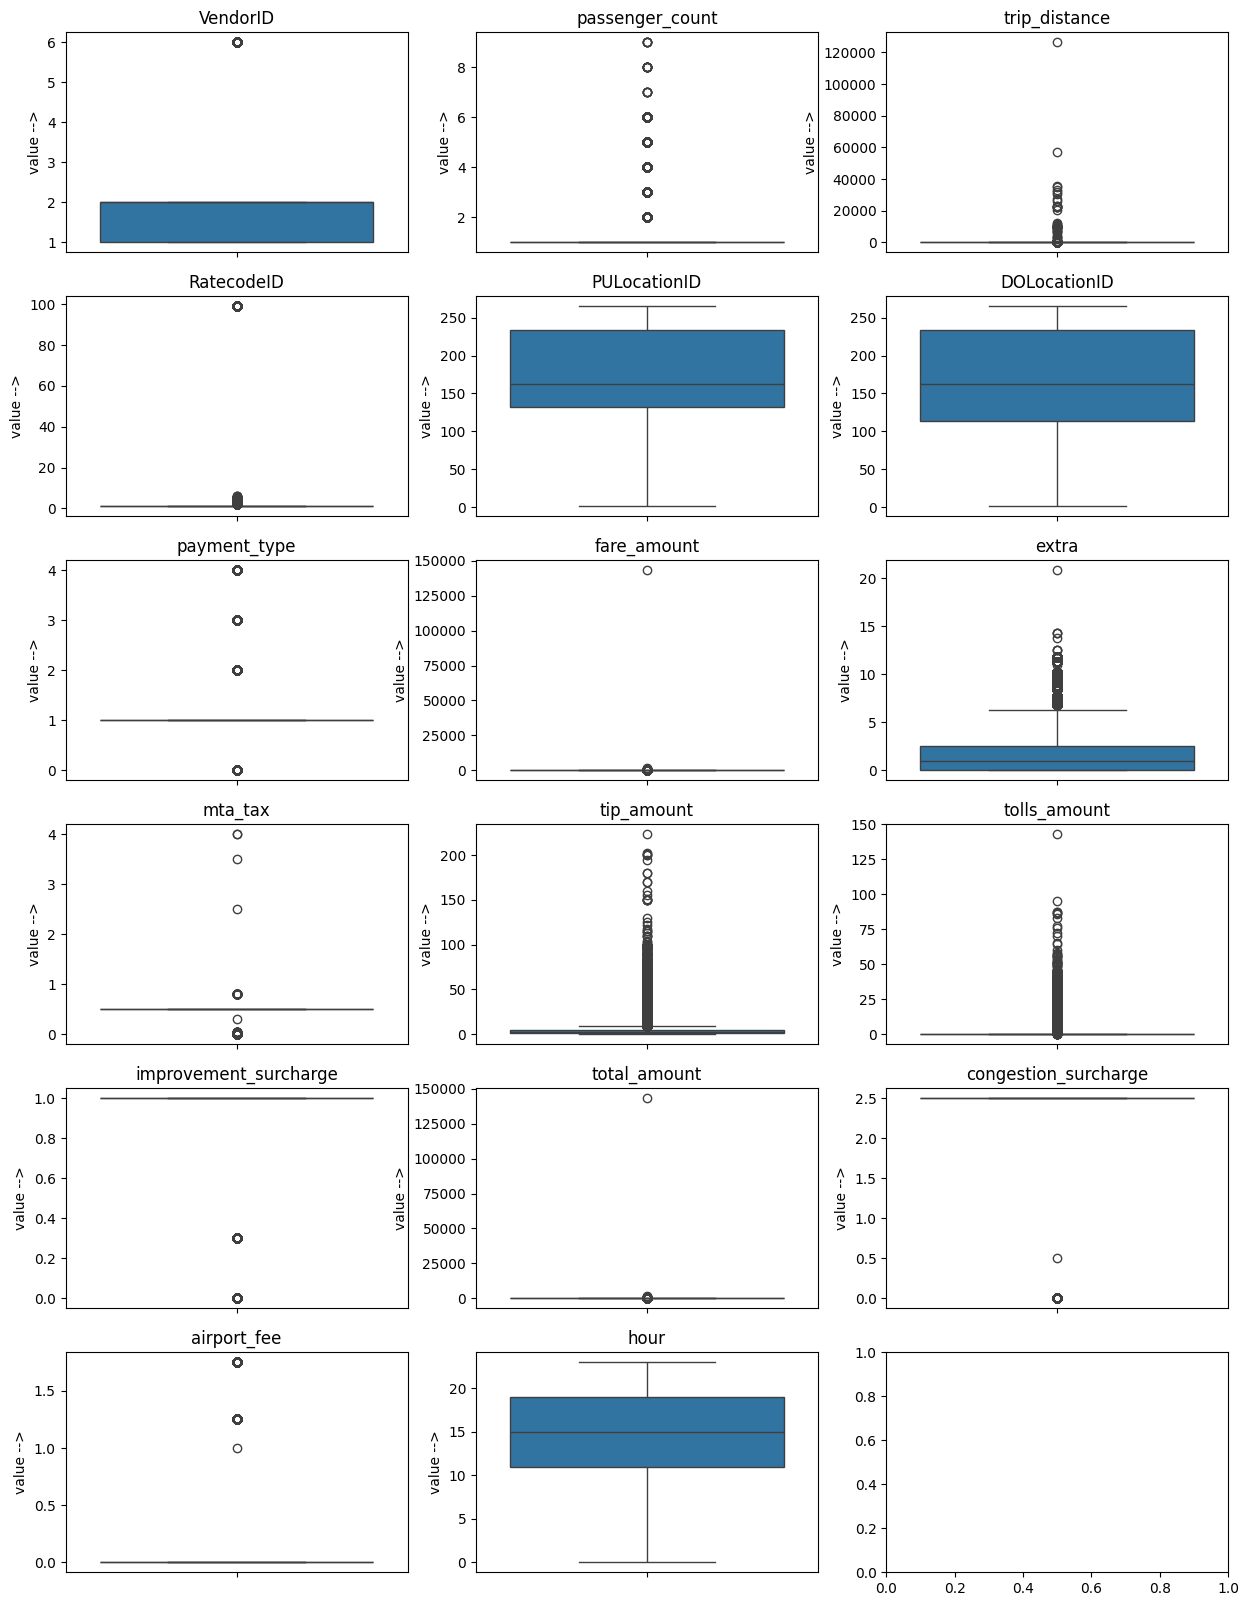

In [29]:
# Visualising outliers using boxplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))  
axes = axes.flatten()
cols=df.select_dtypes(include=['number']).columns
# Plot boxplots
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("value -->")

plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [30]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
print('trip_distance is nearly 0 and fare_amount is more than 300:', len(df[(df["trip_distance"] < 0.01) & (df["fare_amount"] > 300)]))

trip_distance is nearly 0 and fare_amount is more than 300: 34


In [31]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
print('Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different"\
"(both distance and fare should not be zero for different zones):', 
      len(df[(df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])]))

Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different""(both distance and fare should not be zero for different zones): 63


In [32]:
# Entries where trip_distance is more than 250 miles.
print('Entries where trip_distance is more than 250 miles:',  len(df[(df["trip_distance"] > 250)]))

Entries where trip_distance is more than 250 miles: 46


In [33]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print('Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary):', len(df[(df["payment_type"] == 0)]))

Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary): 64874


In [34]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

print(df["passenger_count"].describe())
print(df['passenger_count'].value_counts())

count    1896379.0
mean      1.372162
std       0.864124
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            6.0
Name: passenger_count, dtype: Float64
passenger_count
1    1471779
2     277298
3      69034
4      38537
5      23871
6      15860
Name: count, dtype: Int64


In [35]:
# Continue with outlier handling

# remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df=df[~((df["trip_distance"] < 0.01) & (df["fare_amount"] > 300))]

# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance 
# and fare should not be zero for different zones)
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

# # Entries where trip_distance is more than 250 miles.
df = df[~(df["trip_distance"] > 250)]

# # Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[~(df["payment_type"] == 0)]


In [36]:
# Do any columns need standardising?
print(df.describe())
print(df.info())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831392e+06                     1831392                     1831392   
mean   1.736326e+00  2023-07-01 21:14:52.700499  2023-07-01 21:32:14.687680   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:10:58  2023-04-01 20:25:38.500000   
50%    2.000000e+00  2023-06-26 08:19:46.500000         2023-06-26 08:35:50   
75%    2.000000e+00  2023-10-05 19:16:32.250000         2023-10-05 19:34:34   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406249e-01                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count        1831392.0   1.831392e+06   1831392.0  1.831392e+06  1.831392e+06   
mean          1.385351   3.444836e+00    1.634048  1.654589e+02  1.643336e+02   
min                1.0   0.000000e+00        

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [37]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

### Answer :
#### Classification of variables specified above

- Categorise the varaibles into Numerical or Categorical.

##### Answer:

* `VendorID`:              Categorical
* `tpep_pickup_datetime`:  Datetime
* `tpep_dropoff_datetime`: Datetime
* `passenger_count`:       Categorical
* `trip_distance`:         Numerical
* `RatecodeID`:            Categorical
* `PULocationID`:          Categorical
* `DOLocationID`:          Categorical
* `payment_type`:          Categorical
* `pickup_hour`:           Numerical
* `trip_duration`:         Numerical

  
- The following monetary parameters belong in the same category, is it categorical or numerical?
* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`
  
#### Answer   : All are Numerical variables

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [38]:
# Add new feature based on  pickup datetime
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

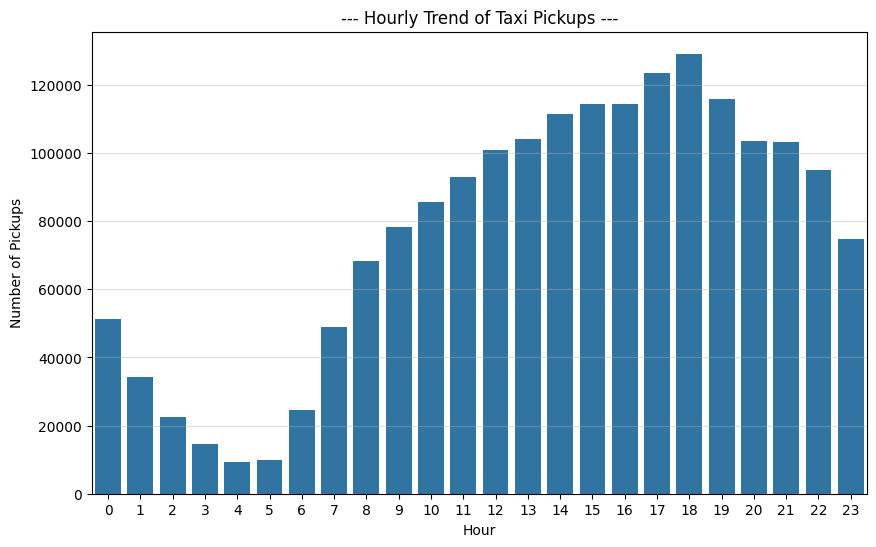

In [39]:
# Find and show the hourly trends in taxi pickups
hourly_trend = df["hour"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trend.index, y=hourly_trend.values)
plt.xticks(range(0, 24))
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.title("--- Hourly Trend of Taxi Pickups ---")
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()


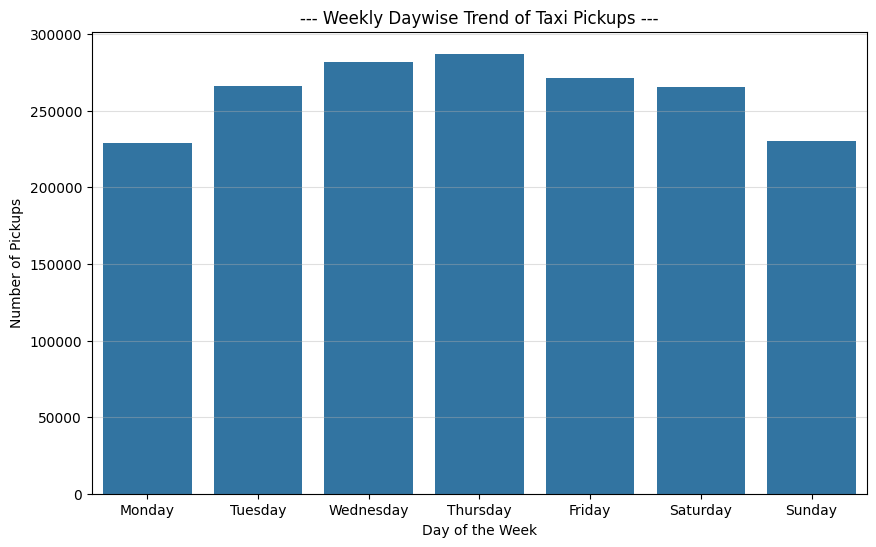

In [40]:
# Find and show the daily trends in taxi pickups (days of the week)
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trend = df['weekday'].value_counts().reindex(day_labels, fill_value=0)

plt.figure(figsize=(10, 6))

sns.barplot(x=weekday_trend.index, y=weekday_trend.values)
plt.xticks(range(0, 7))
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("--- Weekly Daywise Trend of Taxi Pickups ---")
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()



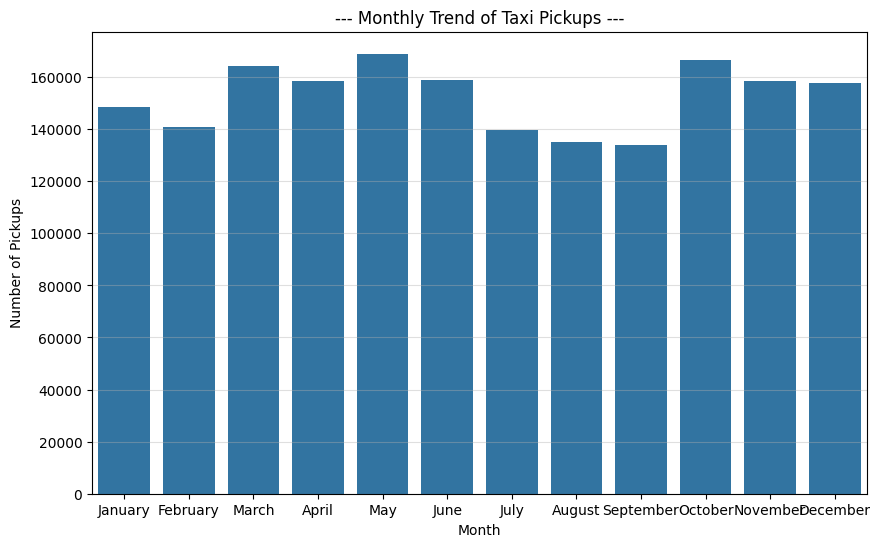

In [41]:
# Show the monthly trends in pickups
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = df['month'].value_counts().reindex(month_labels, fill_value=0)

plt.figure(figsize=(10, 6))

sns.barplot(x=monthly_trend.index, y=monthly_trend.values)
plt.xticks(range(0, 12))
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("--- Monthly Trend of Taxi Pickups ---")
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [42]:
# Analyse the above parameters
financial_param = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
print(df[financial_param].describe())

print("\n\nmin value of fare_amount", df['fare_amount'].mean())
print("min value of tip_amount", df['tip_amount'].mean())
print("min value of total_amount", df['total_amount'].mean())
print("min value of trip_distance", df['trip_distance'].mean())

        fare_amount    tip_amount  total_amount  trip_distance
count  1.831392e+06  1.831392e+06  1.831392e+06   1.831392e+06
mean   1.981709e+01  3.573525e+00  2.894078e+01   3.444836e+00
std    1.073407e+02  4.069436e+00  1.082181e+02   4.545772e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.780000e+00
75%    2.190000e+01  4.450000e+00  3.070000e+01   3.370000e+00
max    1.431635e+05  2.230800e+02  1.431675e+05   2.048600e+02


min value of fare_amount 19.817091802301206
min value of tip_amount 3.5735245212384896
min value of total_amount 28.940781509365568
min value of trip_distance 3.4448358953189717


#### Answer :
#### these fields does not contain Negative or 0 values as it was already cleaned up earlier
   

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

#### Answer :
#### These fields does not contain Negative or 0 values as it was already cleaned up earlier. But better to create a copy of this dataframe.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[(df[financial_param] > 0).all(axis=1)].copy()
non_zero_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1412905 entries, 1 to 1896399
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1412905 non-null  int64         
 1   tpep_pickup_datetime   1412905 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1412905 non-null  datetime64[us]
 3   passenger_count        1412905 non-null  Int64         
 4   trip_distance          1412905 non-null  float64       
 5   RatecodeID             1412905 non-null  Int64         
 6   PULocationID           1412905 non-null  int64         
 7   DOLocationID           1412905 non-null  int64         
 8   payment_type           1412905 non-null  int64         
 9   fare_amount            1412905 non-null  float64       
 10  extra                  1412905 non-null  float64       
 11  mta_tax                1412905 non-null  float64       
 12  tip_amount             1412905 no

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

        month  total_amount
4     January    3216268.43
3    February    3059834.43
7       March    3687542.14
0       April    3571705.91
8         May    3927809.27
6        June    3678632.41
5        July    3118144.43
1      August    3016976.09
11  September    3186213.26
10    October    3971198.31
9    November    3727484.32
2    December    3629658.91


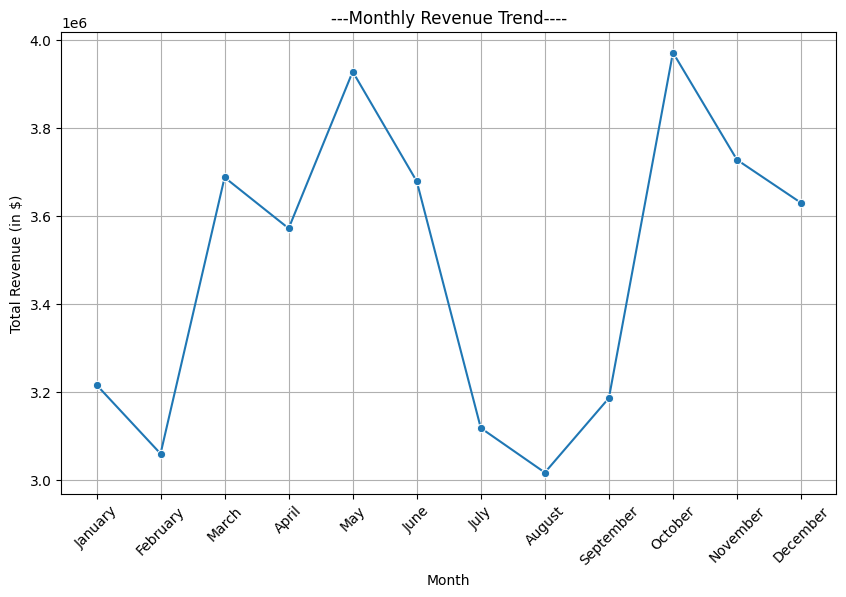

In [44]:
# Group data by month and analyse monthly revenue
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_rev = non_zero_df.groupby('month', as_index=False)['total_amount'].sum()
monthly_rev['month'] = pd.Categorical(monthly_rev['month'], categories = months, ordered=True)
monthly_rev = monthly_rev.sort_values('month')
print(monthly_rev)

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_rev['month'], y=monthly_rev['total_amount'], marker='o')

plt.title("---Monthly Revenue Trend----")
plt.xlabel('Month')
plt.ylabel('Total Revenue (in $)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

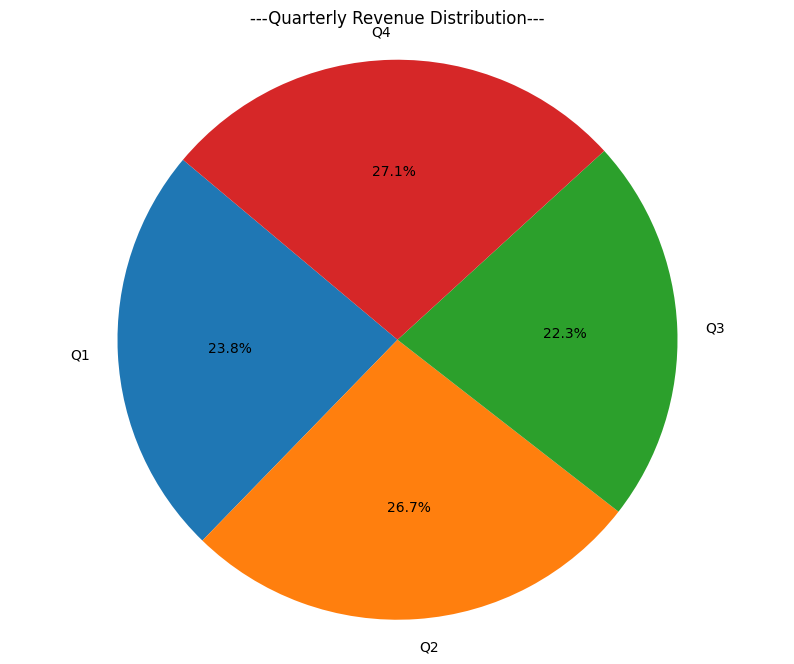

In [45]:
# Calculate proportion of each quarter
non_zero_df['month_num'] = df["tpep_pickup_datetime"].dt.month
quarter_name=['Q1','Q2','Q3','Q4']
non_zero_df['pickup_quarter']=(non_zero_df['month_num'] - 1)//3+1
quarterly_revenue = non_zero_df.groupby('pickup_quarter')['total_amount'].sum()

#pie chart
plt.figure(figsize=(10, 8))
plt.pie(quarterly_revenue, labels=quarter_name, autopct='%1.1f%%', startangle=140)
plt.title("---Quarterly Revenue Distribution---")
plt.axis('equal') 
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

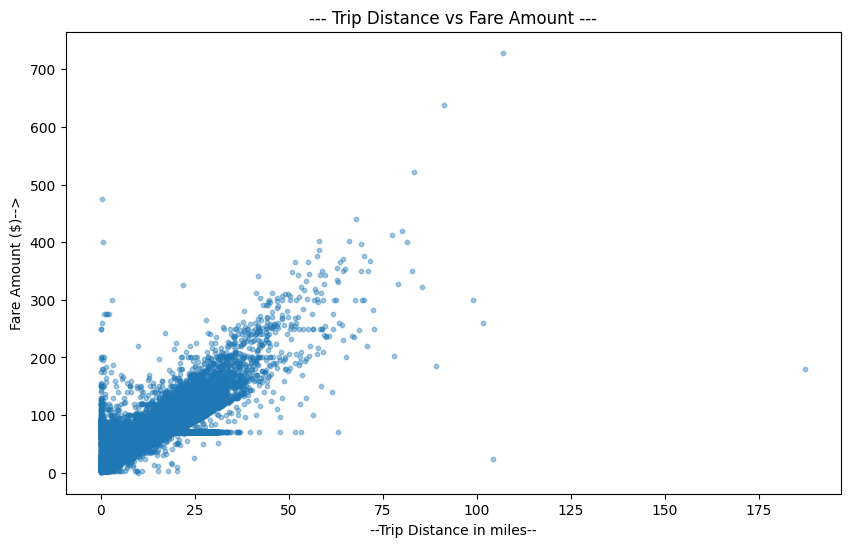

In [46]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
plt.scatter(non_zero_df['trip_distance'], non_zero_df['fare_amount'], alpha=0.4, s=10)
plt.title("--- Trip Distance vs Fare Amount ---")
plt.xlabel('--Trip Distance in miles--')
plt.ylabel('Fare Amount ($)-->')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

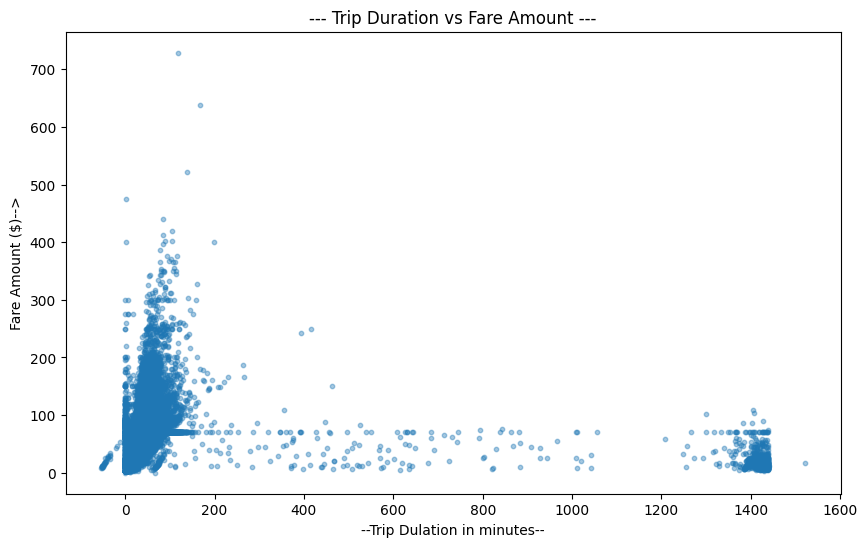

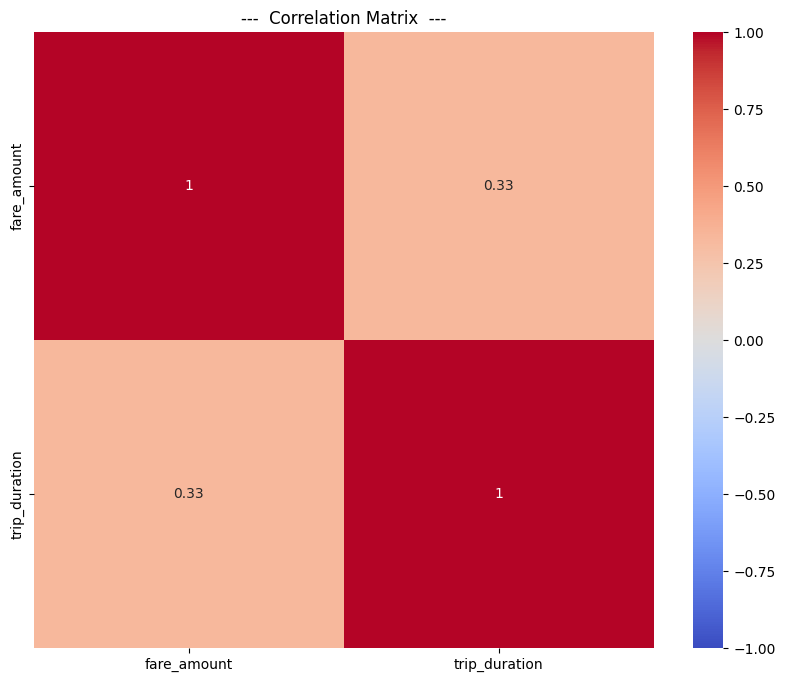

In [47]:
# Show relationship between fare and trip duration
non_zero_df["trip_duration"] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
plt.scatter(x=non_zero_df['trip_duration'], y= non_zero_df['fare_amount'], alpha=0.4, s=10)
plt.title("--- Trip Duration vs Fare Amount ---")
plt.xlabel('--Trip Dulation in minutes--')
plt.ylabel('Fare Amount ($)-->')
plt.show()

# Correlation Analysis
corr_cols = ['fare_amount', 'trip_duration']
corr_matrix = non_zero_df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("---  Correlation Matrix  ---")
plt.show()


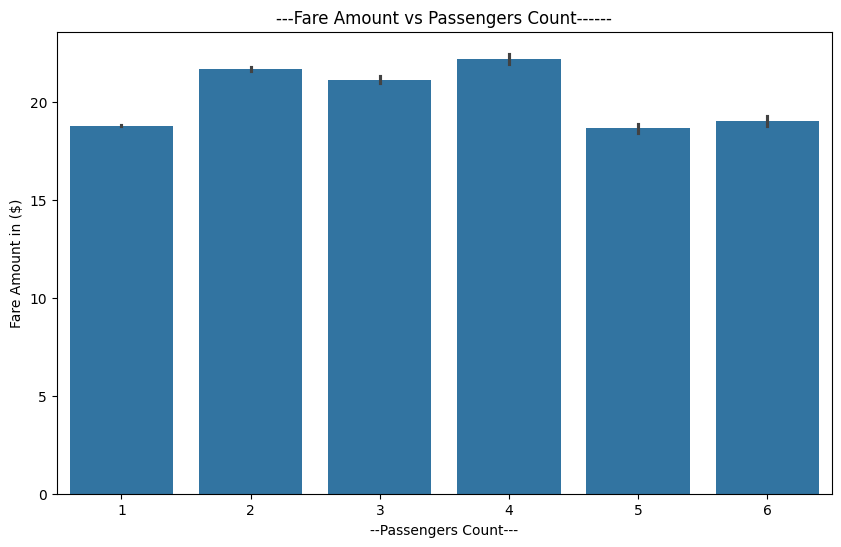

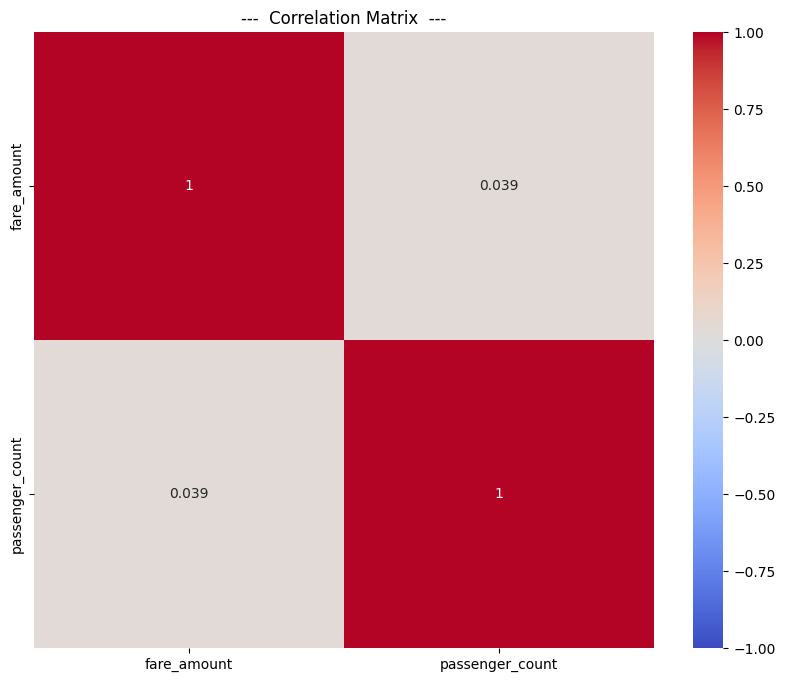

In [48]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=non_zero_df['passenger_count'], y=non_zero_df['fare_amount'])
plt.title("---Fare Amount vs Passengers Count------")
plt.xlabel("--Passengers Count---")
plt.ylabel("Fare Amount in ($)")
plt.show()

# Passenger count 0 was updated with mode (1) so passenger count 0 is not appearing in the plot

# Correlation Analysis
corr_cols = ['fare_amount', 'passenger_count']
corr_matrix = non_zero_df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("---  Correlation Matrix  ---")
plt.show()


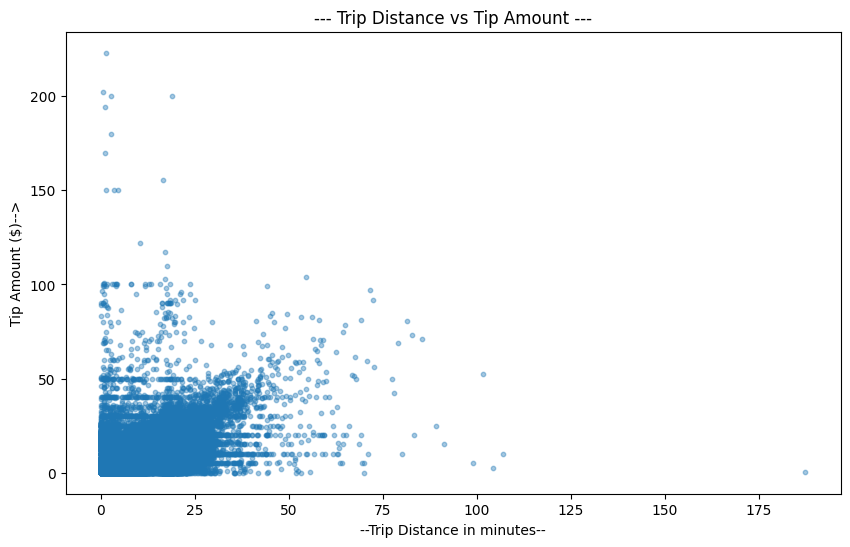

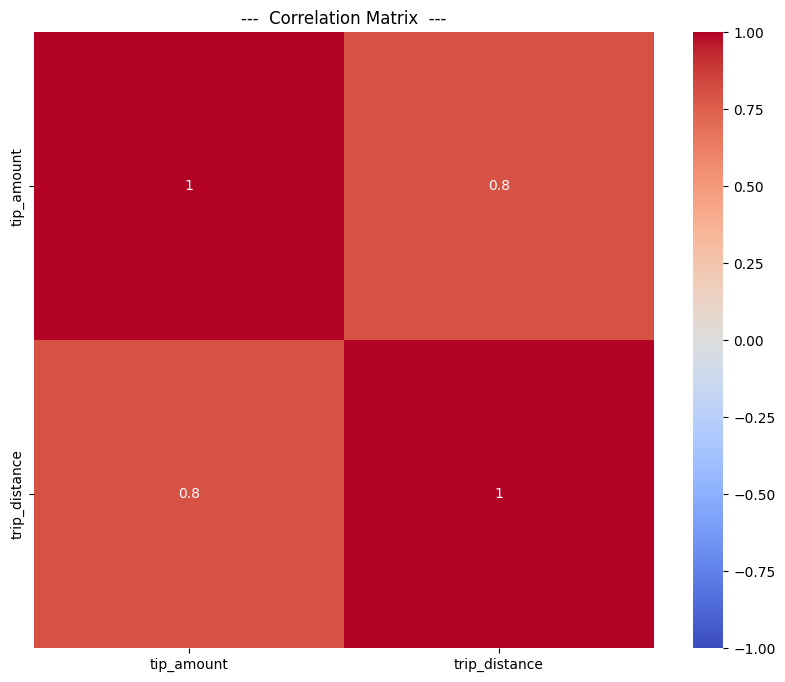

In [49]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
plt.scatter(x=non_zero_df['trip_distance'], y = non_zero_df['tip_amount'], alpha=0.4, s=10)
plt.title("--- Trip Distance vs Tip Amount ---")
plt.xlabel('--Trip Distance in minutes--')
plt.ylabel('Tip Amount ($)-->')
plt.show()

# Correlation Analysis
corr_cols = ['tip_amount', 'trip_distance']
corr_matrix = non_zero_df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("---  Correlation Matrix  ---")
plt.show()

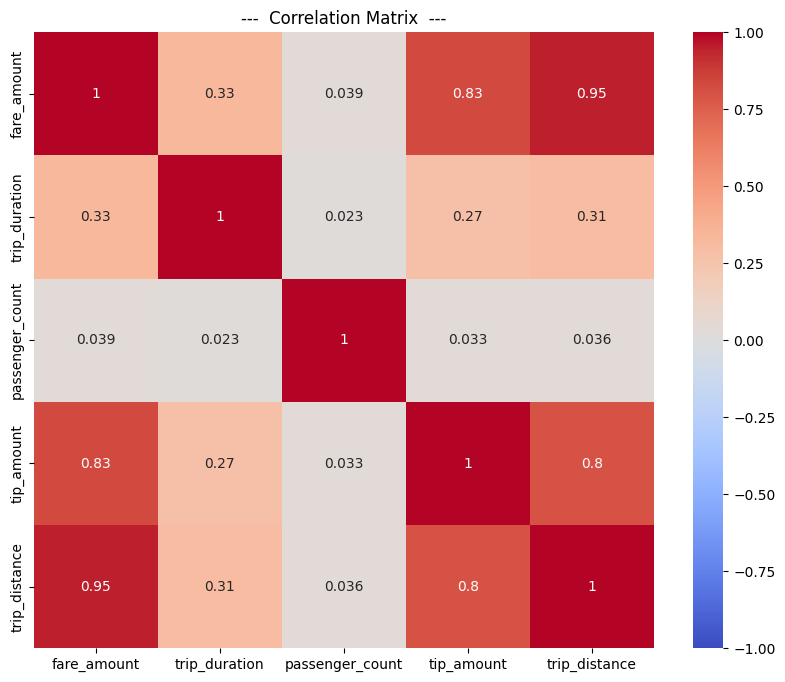

In [50]:
# Correlation Analysis
corr_cols = ['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']
corr_matrix = non_zero_df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("---  Correlation Matrix  ---")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

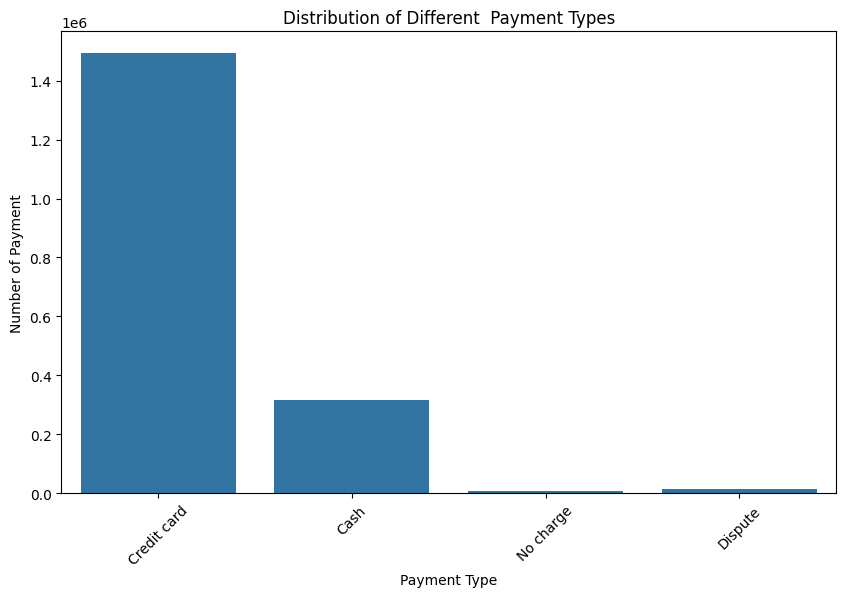

In [51]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(10, 6))
plt.title('Distribution of Different  Payment Types')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Credit card', 'Cash', 'No charge', 'Dispute'], rotation=45)
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Number of Payment')

plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [52]:
#pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [53]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

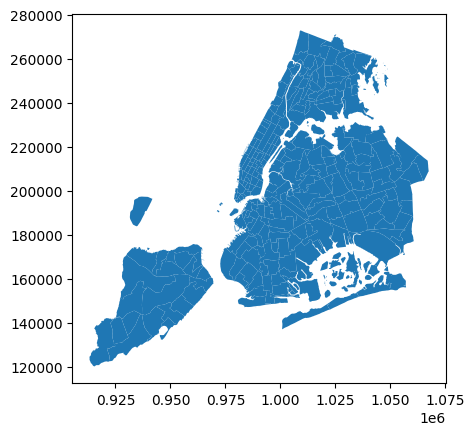

In [54]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [55]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(non_zero_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
1         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   
2         2  2023-01-01 00:58:00   2023-01-01 01:08:31                2   
3         2  2023-01-01 00:16:06   2023-01-01 00:31:59                1   
4         2  2023-01-01 00:44:09   2023-01-01 01:01:17                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24           1           161           237             1   
1           7.10           1           246            37             1   
2           1.59           1            79           164             1   
3           3.16           1            79           256             1   
4           7.64           1           132            95             1   

   fare_amount  ...  month_num  pickup_quarter  trip_duration  OBJECTID  \
0          7.9  ...          1               1       5.083333     161.0   
1         34.5  ...          1               1      33.616667     246.0   
2         11.4  ...          1               1      10.516667      79.0   
3         19.1  ...          1               1      15.883333      79.0   
4         31.7  ...          1               1      17.133333     132.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.035804    0.000072             Midtown Center       161.0  Manhattan   
1    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
2    0.042625    0.000108               East Village        79.0  Manhattan   
3    0.042625    0.000108               East Village        79.0  Manhattan   
4    0.245479    0.002038                JFK Airport       132.0     Queens   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((983031.177 217138.506, 983640.32 216...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [56]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby('PULocationID').size().reset_index(name='total_trips')

print(trips_per_location.head())


   PULocationID  total_trips
0             1          214
1             2            2
2             3           40
3             4         1861
4             5           13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [57]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  total_trips  
0           1.0        214.0  
1           2.0          2.0  
2           3.0         40.0  
3           4.0       1861.0  
4           5.0         13.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1500x1000 with 0 Axes>

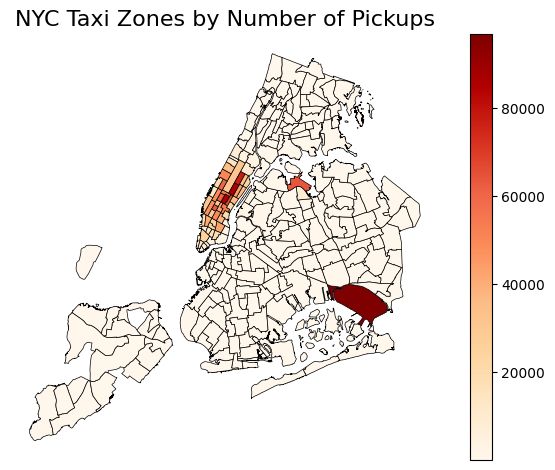

In [58]:
# Define figure and axis
plt.figure(figsize=(15, 10))
zones_with_trips.plot( column='total_trips',  cmap='OrRd',  legend=True,  edgecolor='black',  linewidth=0.5 )

# Plot the map and display it
plt.title("NYC Taxi Zones by Number of Pickups", fontsize=16)
plt.axis('off')                 
plt.tight_layout()
plt.show()

In [59]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by number of trips in descending order
top_zones = zones_with_trips.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones
top_zones[['zone', 'borough', 'total_trips']].head(10)

zone    borough  total_trips
131                   JFK Airport     Queens      96827.0
236         Upper East Side South  Manhattan      86905.0
160                Midtown Center  Manhattan      85948.0
235         Upper East Side North  Manhattan      77517.0
161                  Midtown East  Manhattan      65634.0
137             LaGuardia Airport     Queens      64177.0
185  Penn Station/Madison Sq West  Manhattan      63471.0
229     Times Sq/Theatre District  Manhattan      61315.0
141           Lincoln Square East  Manhattan      60887.0
169                   Murray Hill  Manhattan      54493.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [60]:
# Find routes which have the slowest speeds at different times of the day
non_zero_df['trip_duration_hour'] = non_zero_df['trip_duration']/60
route_speed = non_zero_df[non_zero_df['PULocationID'] != non_zero_df['DOLocationID'] ].groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    tot_distance=('trip_distance', 'sum'),
    tot_duration=('trip_duration_hour', 'sum'),
    trip_count=('trip_distance', 'count')
).reset_index()

route_speed['average_speed']=route_speed['tot_distance']/route_speed['tot_duration']

slow_route_df = route_speed[route_speed['average_speed']>0].nsmallest(10, 'average_speed')
slow_route_df

PULocationID  DOLocationID  hour  tot_distance  tot_duration  \
91465           243           264    17          0.18     23.159167   
2217             13           209     7          1.72     23.658056   
53806           151            24     1          1.91     24.103889   
14787            70           138     6          1.49     17.376111   
73960           224           113    20          2.39     24.118889   
88101           237           238     4          2.85     23.675833   
8722             48           184     1          0.14      1.094444   
66600           170           125     2          3.07     23.333056   
72105           211            52    18          3.17     23.848889   
28644           113            66    12          3.43     23.809722   

       trip_count  average_speed  
91465           1       0.007772  
2217            2       0.072703  
53806           4       0.079240  
14787           1       0.085750  
73960           3       0.099092  
88101           1       0.120376  
8722            1       0.127919  
66600           1       0.131573  
72105           1       0.132920  
28644           1       0.144059

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

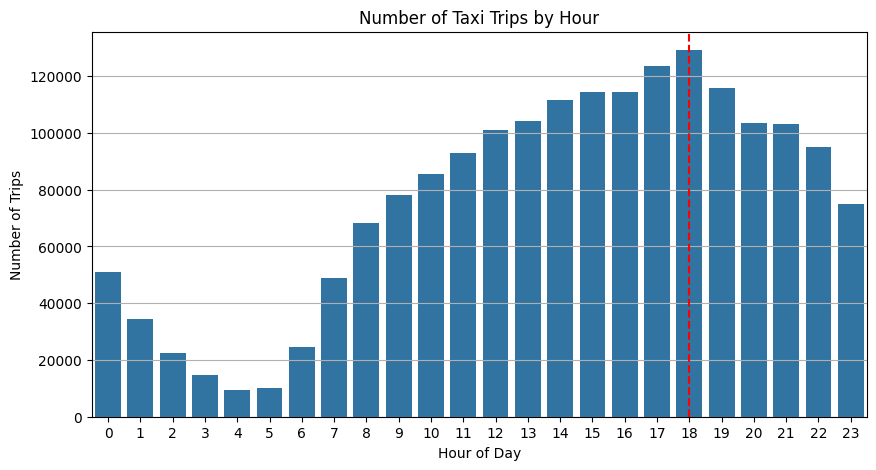

In [61]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_df = df['hour'].value_counts().sort_index()
peak_hour = hourly_trip_df.idxmax()
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trip_df.index, y=hourly_trip_df.values)
plt.axvline(x=peak_hour, color="red", linestyle="--")
plt.title("Number of Taxi Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

In [62]:
# Hourly  number of trips.
print(hourly_trip_df)

hour
0      51164
1      34278
2      22551
3      14710
4       9436
5      10021
6      24468
7      48990
8      68278
9      78289
10     85629
11     93037
12    101004
13    104107
14    111577
15    114301
16    114289
17    123563
18    129190
19    115920
20    103435
21    103167
22     95160
23     74828
Name: count, dtype: int64


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [63]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers. 5% of actual data was used for sampling
sample_fraction = 0.05

# Count trips per hour
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')
# Scale up the trip count
hourly_trips['actual_total_trips'] = hourly_trips['trip_count'] / sample_fraction

# Actual number of trip counts for 5 businest hours
print(hourly_trips['actual_total_trips'].nlargest(5))
print("\nActual number of total Trips in 5 business hours ", hourly_trips['actual_total_trips'].nlargest(5).sum())

18    2583800.0
17    2471260.0
19    2318400.0
15    2286020.0
16    2285780.0
Name: actual_total_trips, dtype: float64

Actual number of total Trips in 5 business hours  11945260.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

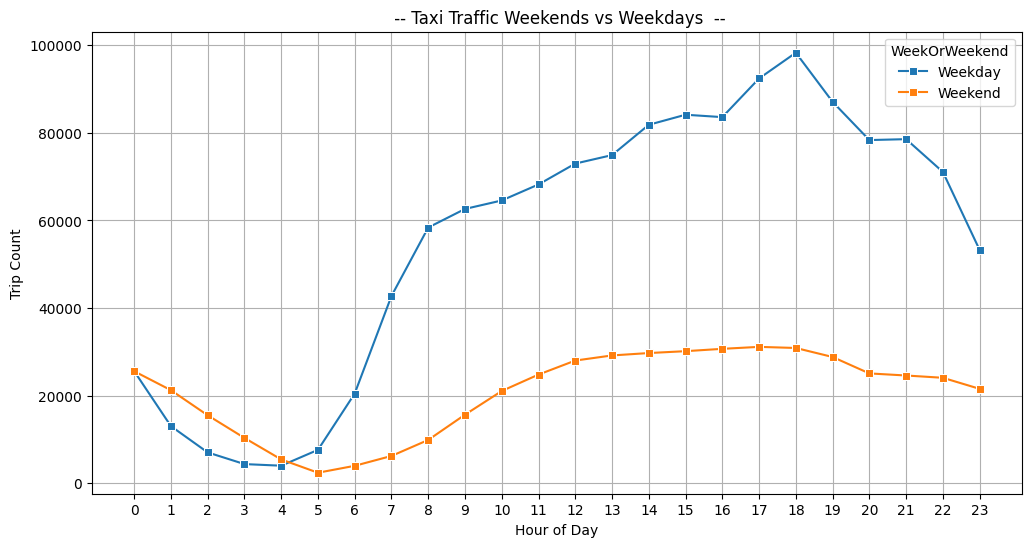

In [64]:
# Compare traffic trends for the week days and weekends
#New column to classify weekday or weekend
df['WeekOrWeekend'] = df['tpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Count number of trips by WeekOrWeekend and hour
WeekOrWeekend_df = df.groupby(['hour', 'WeekOrWeekend']).size().reset_index(name='WeekOrWeekend_trip_count')

# Plot the result
plt.figure(figsize=(12, 6))
sns.lineplot(data=WeekOrWeekend_df, x='hour', y='WeekOrWeekend_trip_count', hue='WeekOrWeekend', marker='s')
plt.title(" -- Taxi Traffic Weekends vs Weekdays  --")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

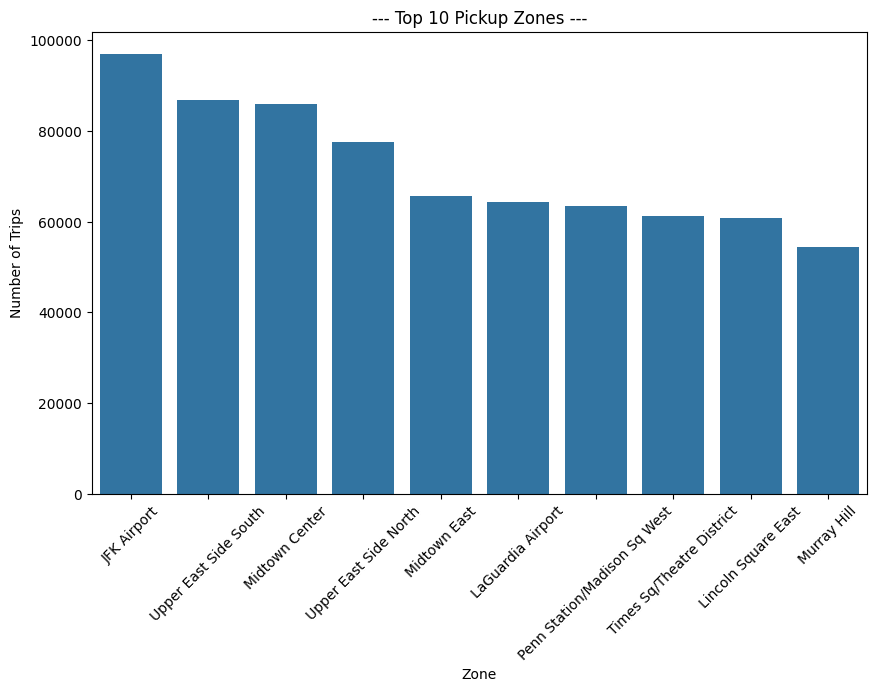

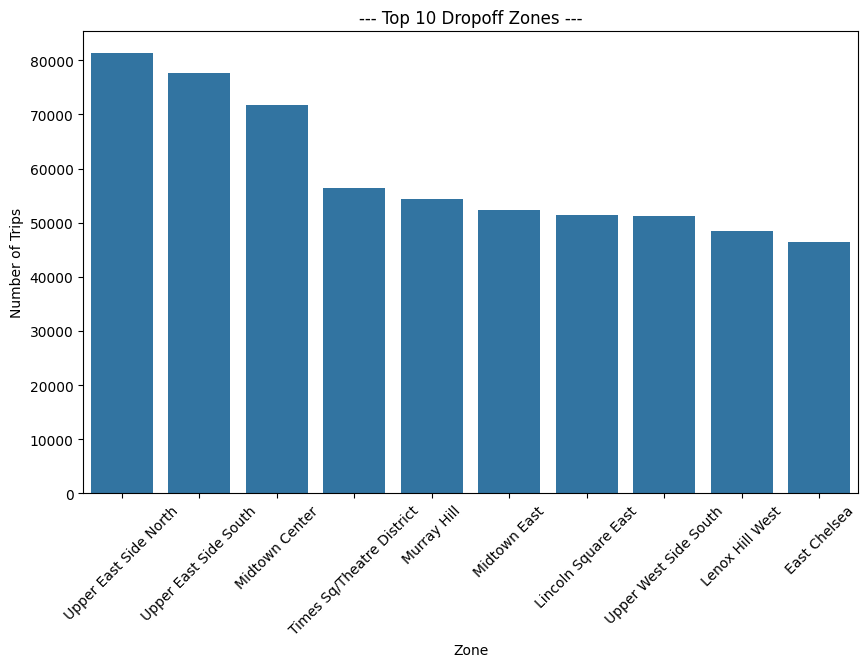

In [65]:
# Find top 10 pickup and dropoff zones
pickup_zones_df = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
dropoff_zones_df = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

df_zones = df.merge(pickup_zones_df[['PULocationID', 'pickup_zone']], on='PULocationID', how='left')\
            .merge(dropoff_zones_df[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')


top_pickup_zones_df = df_zones['pickup_zone'].value_counts().head(10)
top_dropoff_zones_df = df_zones['dropoff_zone'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pickup_zones_df.index, y=top_pickup_zones_df.values)
plt.xticks(rotation=45)
plt.title("--- Top 10 Pickup Zones ---")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_dropoff_zones_df.index, y=top_dropoff_zones_df.values)
plt.xticks(rotation=45)
plt.title("--- Top 10 Dropoff Zones ---")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [66]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts_df = merged_df["LocationID"].value_counts().reset_index(name="Pickup")
dropoff_counts_df = merged_df["DOLocationID"].value_counts().rename_axis("LocationID").reset_index(name="Dropoff")

prick_drop_ratio = pickup_counts_df.merge(dropoff_counts_df, on="LocationID", how="outer").fillna(0)

prick_drop_ratio = prick_drop_ratio[prick_drop_ratio["Dropoff"] >0]

prick_drop_ratio["Pickup_Dropoff_Ratio"] = prick_drop_ratio["Pickup"] / prick_drop_ratio["Dropoff"]
prick_drop_ratio = prick_drop_ratio.merge(zones, on="LocationID", how="left")[["zone", "Pickup", "Dropoff", "Pickup_Dropoff_Ratio"]]


top10_ratios = prick_drop_ratio.sort_values(by="Pickup_Dropoff_Ratio", ascending=False).head(10)
bottom10_ratios = prick_drop_ratio.sort_values(by="Pickup_Dropoff_Ratio", ascending=True).head(10)

print("Top 10 Zones with Highest Pickup or Dropoff Ratios:")
print(top10_ratios)
print("\n\nbottom 10 Zones with Highest Pickup or Dropoff Ratios:")
print(bottom10_ratios)

Top 10 Zones with Highest Pickup or Dropoff Ratios:
                                 zone   Pickup  Dropoff  Pickup_Dropoff_Ratio
69                      East Elmhurst   6402.0    462.0             13.857143
126                       JFK Airport  63639.0  13430.0              4.738570
132                 LaGuardia Airport  51617.0  17977.0              2.871280
200  Saint Michaels Cemetery/Woodside     12.0      7.0              1.714286
180      Penn Station/Madison Sq West  48583.0  29442.0              1.650126
41                       Central Park  23917.0  17235.0              1.387699
108           Greenwich Village South  19825.0  14340.0              1.382497
242                      West Village  33898.0  25470.0              1.330899
156                      Midtown East  52690.0  41354.0              1.274121
155                    Midtown Center  67730.0  55371.0              1.223203


bottom 10 Zones with Highest Pickup or Dropoff Ratios:
                                 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [67]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = merged_df[(merged_df["hour"] >= 23) | (merged_df["hour"] <= 5)]

night_pickups_df = night_df["LocationID"].value_counts().rename_axis("LocationID").reset_index(name="Night Pickups")
night_dropoffs_df = night_df["DOLocationID"].value_counts().rename_axis("LocationID").reset_index(name="Night Drop-offs")
night_pickups_df = night_pickups_df.merge(zones, on="LocationID", how="left")[["zone", "borough", "Night Pickups"]]
night_dropoffs_df = night_dropoffs_df.merge(zones, on="LocationID", how="left")[["zone", "borough", "Night Drop-offs"]]

top_night_pickups = night_pickups_df.head(10)
top_night_dropoffs = night_dropoffs_df.head(10)

print("Top 10 Night Pickup Zones (11pm to 5am):  ")
print(top_night_pickups)
print("\n\n\n\nTop 10 Night Dropoff Zones (11pm to 5am):  ")
print(top_night_dropoffs)

Top 10 Night Pickup Zones (11pm to 5am):  
                           zone    borough  Night Pickups
0                  East Village  Manhattan          12843
1                  West Village  Manhattan          10494
2                   JFK Airport     Queens           9509
3                  Clinton East  Manhattan           8060
4               Lower East Side  Manhattan           8005
5       Greenwich Village South  Manhattan           7285
6     Times Sq/Theatre District  Manhattan           5881
7  Penn Station/Madison Sq West  Manhattan           5354
8                 Midtown South  Manhattan           4786
9             LaGuardia Airport     Queens           4689




Top 10 Night Dropoff Zones (11pm to 5am):  
                    zone    borough  Night Drop-offs
0           East Village  Manhattan             6754
1           Clinton East  Manhattan             5106
2            Murray Hill  Manhattan             5046
3               Gramercy  Manhattan             4851
4     

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share for Night Hours: 12.151899652026888 %
Revenue Share for Day Hours: 87.84810034797312 %


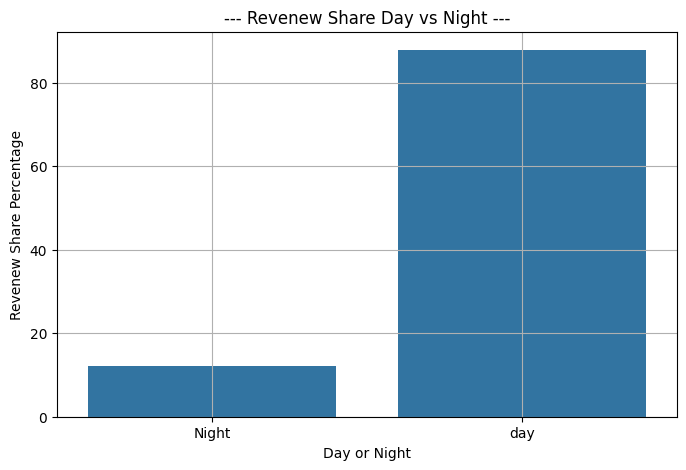

In [68]:
# Filter for night hours (11 PM to 5 AM)
night_trips = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
day_trips = df[(df['hour'] > 5) & (df['hour'] < 23)]
night_revenue = night_trips ['fare_amount'].sum()
day_revenue = day_trips['fare_amount'].sum()


revenue_share = (night_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Night Hours:", revenue_share, "%")
revenue_share = (day_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Day Hours:", revenue_share, "%")
rev_dict={}
rev_dict["DayNight"]=["Night","day"]
rev_dict["RevenuePcnt"]=[(night_revenue / (night_revenue + day_revenue)) * 100, (day_revenue / (night_revenue + day_revenue)) * 100]
rev_ocnt_df= pd.DataFrame(rev_dict)

plt.figure(figsize=(8, 5))
sns.barplot(rev_ocnt_df, x=rev_ocnt_df.DayNight, y=rev_ocnt_df.RevenuePcnt)
plt.title("--- Revenew Share Day vs Night ---")
plt.xlabel("Day or Night")
plt.ylabel("Revenew Share Percentage")
plt.grid(True)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [69]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fare_df = merged_df[(merged_df["trip_distance"] > 0) & (merged_df["passenger_count"] > 0)].copy()
valid_fare_df["fare_per_mile"] = valid_fare_df["fare_amount"] / valid_fare_df["trip_distance"]
valid_fare_df["fare_per_mile_per_passenger"] = valid_fare_df["fare_per_mile"] / valid_fare_df["passenger_count"]
fare_analysis_df = valid_fare_df.groupby("passenger_count")[["fare_per_mile", "fare_per_mile_per_passenger"]].mean()
print("Average fare per Mile per passenger for different Passenger counts:")
fare_analysis_df

Average fare per Mile per passenger for different Passenger counts:


fare_per_mile  fare_per_mile_per_passenger
passenger_count                                            
1                     9.265572                     9.265572
2                    10.005446                     5.002723
3                     9.985896                     3.328632
4                    15.731920                      3.93298
5                     7.945660                     1.589132
6                     7.708165                     1.284694

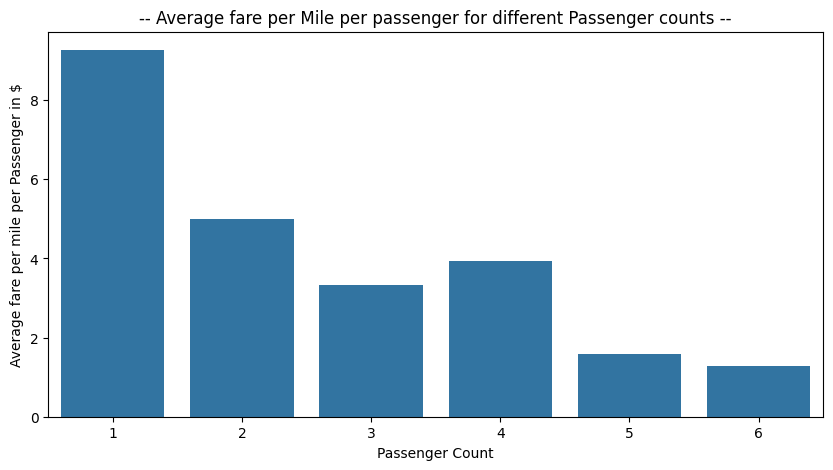

In [70]:
# Plot Average fare per Mile per passenger for different Passenger counts
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_analysis_df.index, y=fare_analysis_df["fare_per_mile_per_passenger"])
plt.xlabel("Passenger Count")
plt.ylabel("Average fare per mile per Passenger in $")
plt.title("-- Average fare per Mile per passenger for different Passenger counts --")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

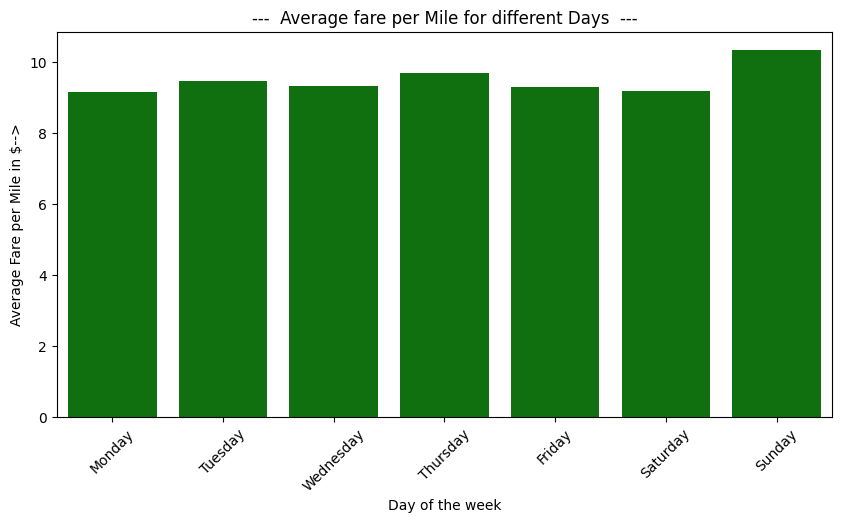

In [71]:
# Compare the average fare per mile for different days and for different times of the day
valid_fare_df = merged_df[merged_df["trip_distance"] > 0].copy()
valid_fare_df["fare_per_mile"] = valid_fare_df["fare_amount"] / valid_fare_df["trip_distance"]
valid_fare_df["pickup_hour"] = valid_fare_df["tpep_pickup_datetime"].dt.hour
valid_fare_df["pickup_day"] = valid_fare_df["tpep_pickup_datetime"].dt.dayofweek

fare_by_day_df = valid_fare_df.groupby("pickup_day")["fare_per_mile"].mean()
x_label = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10, 5))
sns.barplot(x=x_label, y=fare_by_day_df.values, color="green")
plt.xlabel('Day of the week')
plt.ylabel("Average Fare per Mile in $-->")
plt.title('---  Average fare per Mile for different Days  ---')
plt.xticks(rotation=45)
plt.show()


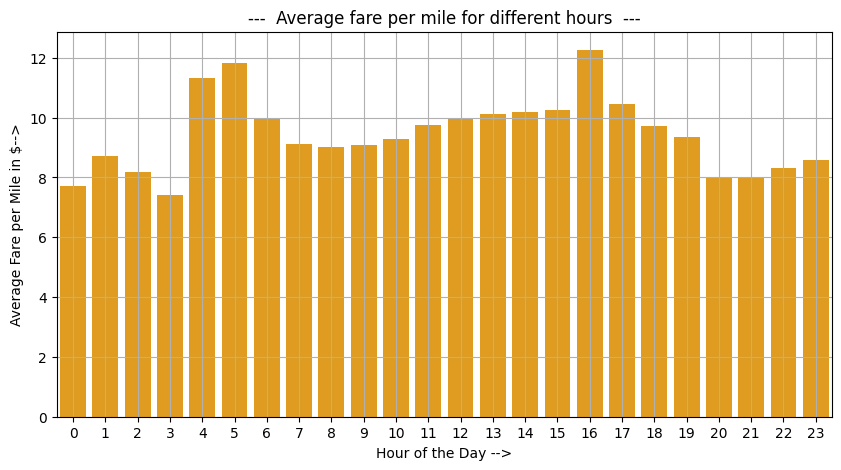

In [72]:
fare_by_hour_df = valid_fare_df.groupby("pickup_hour")["fare_per_mile"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_by_hour_df.index, y=fare_by_hour_df.values, color="orange")
plt.xlabel("Hour of the Day -->")
plt.ylabel("Average Fare per Mile in $-->")
plt.title("---  Average fare per mile for different hours  ---")
plt.xticks(range(24))
plt.grid()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

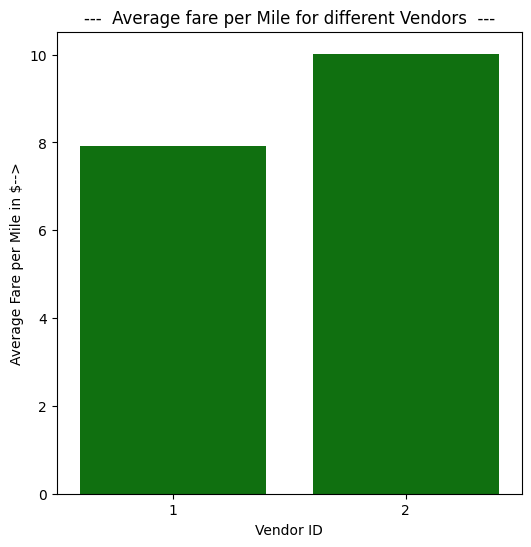

In [73]:

fare_by_day_df = valid_fare_df.groupby("VendorID")["fare_per_mile"].mean()
x_label = ["1","2"]
plt.figure(figsize=(6, 6))
sns.barplot(x=x_label, y=fare_by_day_df.values, color="green")
plt.xlabel('Vendor ID')
plt.ylabel("Average Fare per Mile in $-->")
plt.title('---  Average fare per Mile for different Vendors  ---')
plt.show()


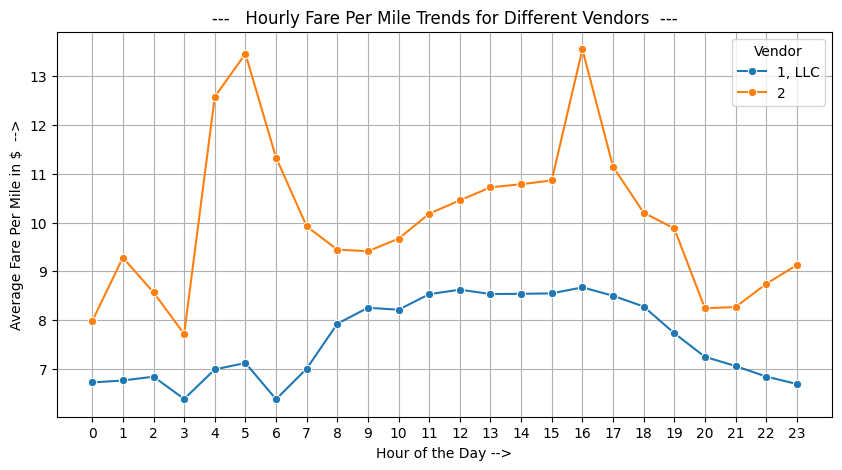

In [74]:

fare_by_vendor_hour_df = valid_fare_df.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()
vendor_labels = {1: "1, LLC", 2: "2"}
fare_by_vendor_hour_df["Vendor"] = fare_by_vendor_hour_df["VendorID"].map(vendor_labels)

plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="fare_per_mile", hue="Vendor", data=fare_by_vendor_hour_df, marker="o")
plt.xlabel("Hour of the Day -->")
plt.ylabel("Average Fare Per Mile in $  -->")
plt.title("---   Hourly Fare Per Mile Trends for Different Vendors  ---")
plt.xticks(range(24))
plt.grid()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [75]:
# Defining distance tiers
dist_tiers = [ (0, 2), (2, 5), (5, float('inf'))]

results = []

# Loop through each distance tier
for min_dist, max_dist in dist_tiers:
    # Filter the data for the current distance tier
    tier_wise_df = valid_fare_df[(valid_fare_df['trip_distance'] > min_dist) & (valid_fare_df['trip_distance'] <= max_dist)]
    # Group by VendorID 
    avg_fare_per_mile = tier_wise_df.groupby('VendorID').apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean()).reset_index()
    avg_fare_per_mile.columns = ['VendorID', 'AvgFarePerMile']
    avg_fare_per_mile['DistanceTier'] = f'{min_dist} - {max_dist}'
    # Append to results
    results.append(avg_fare_per_mile)

vendor_rate_tier = pd.concat(results, ignore_index=True)
vendor_rate_tier


VendorID  AvgFarePerMile DistanceTier
0         1        9.522406        0 - 2
1         2       13.605037        0 - 2
2         1        6.361363        2 - 5
3         2        6.547484        2 - 5
4         1        4.473116      5 - inf
5         2        4.505632      5 - inf

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [76]:
valid_fare_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'weekday',
       'month', 'month_num', 'pickup_quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'fare_per_mile', 'pickup_hour', 'pickup_day'],
      dtype='object')

In [77]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_fare_df['tip_percentage'] = (valid_fare_df['tip_amount'] / valid_fare_df['fare_amount']) * 100
valid_fare_df.groupby(['passenger_count'])['tip_percentage'].mean()

passenger_count
1    26.511686
2    25.817048
3    25.808934
4    25.891464
5    26.049993
6    26.162098
Name: tip_percentage, dtype: float64

In [78]:
valid_fare_df.groupby(['pickup_hour'])['tip_percentage'].mean()

pickup_hour
0     25.858710
1     26.147477
2     26.566122
3     27.557512
4     27.081072
5     26.137740
6     25.278529
7     25.001807
8     25.015966
9     25.301996
10    25.543501
11    25.534519
12    25.411263
13    25.443455
14    25.189873
15    25.040147
16    27.152997
17    30.870668
18    27.590292
19    27.461604
20    26.485473
21    26.281526
22    26.028308
23    25.770840
Name: tip_percentage, dtype: float64

In [79]:
valid_fare_df.groupby(['trip_distance'])['tip_percentage'].mean()

trip_distance
0.01      60.771895
0.02      40.890684
0.03      40.275815
0.04      30.420399
0.05      65.028276
            ...    
99.02      1.666667
101.50    20.269231
104.30    11.716738
107.00     1.371930
187.35     0.083333
Name: tip_percentage, Length: 3676, dtype: float64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [80]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

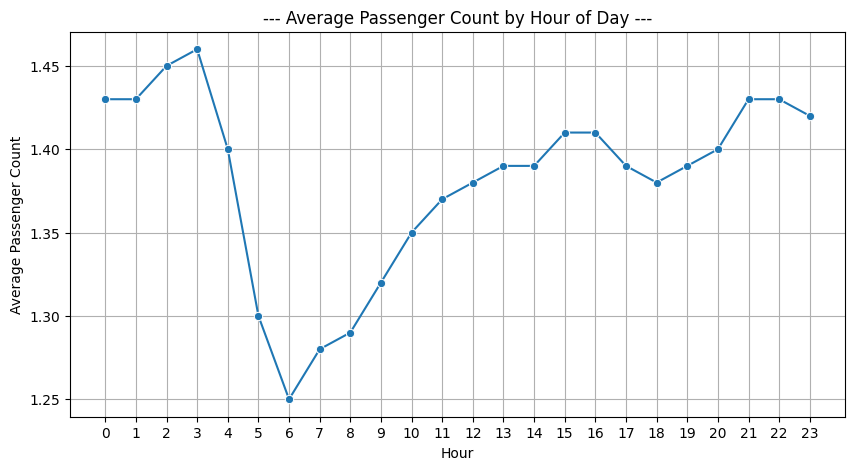

In [81]:
# See how passenger count varies across hours and days
avg_passenger_by_hour = df.groupby('hour')['passenger_count'].mean().round(2)
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_passenger_by_hour.index, y=avg_passenger_by_hour.values, marker='o')
plt.title("--- Average Passenger Count by Hour of Day ---")
plt.xlabel("Hour")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [82]:
# How does passenger count vary across zones



In [83]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [84]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##### Following strategies can be applied to optimize routing and dispatching based on demand patterns and operational inefficiencies:
-	Peak hour strategy:
   * a.	Demands are high at evening hours around 4pm - 8pm. Plan for more cabs.
   * b.	Avoid congestion route during peak hours.
   * c.	More cabs to be planned in the high demand zone.
   * d.	Round trips can be maximized.
-	Incentive:
   * a.	There can be discounts on fare during off peak hour ( early morning and other off peak hour) and weekend to promote more travel during this time
    * b.	Many taxi returns without passengers. Implementing discounted fated in empty return route/time will increase revenue.  
-	Operational Strategies:
    * a.	Most of the people pay through Credit card. It has to be ensured that credit card system in car is always operational and fast.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

-	Cabs can be planned  appropriately over weekends as less trip counts are observed.
-	Position more cabs during middle of the week Wednesday-Thursday.
-	Position more cabs during peak hour 4pm – 9pm.
-	More demands for Airports pickup points during peak arrival times for business travelers 6am-9am
-	High Pickup zones : Airports, Midtown East and Penn Station
-	High Dropoff zones : Midtown East, Penn Station and West Village
-	A spike in trips occurs near clubs and entertainment districts


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##### Peak Hour pricing:
- Dynamic Pricing Increase prices during peak demand hours, events, and busy zones. 
- Discount fares during off-peak hours, raise prices during peak times. 
##### zone /distance Based pricing:
- Zone-Based Pricing Implement dynamic pricing based on Zone
- Correlation between Trip Duration and Fare Amount is less. Implement additional charges for congestion. 
- Adjusting per-mile fares can make longer trips will be more beneficial.
##### Airport Fare:
- Rate optimization for airport pickup and drop. Additional discounts for maximum empty return time.

##### Other Strategy:
- Most of the users are paying via credit-card. Offer more discount on credit card during non peak hour.
